En el apartado "Loading Data" de esta URL:

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Se explica cómo se cargan una serie de datos: 

1. Utiliza esa misma forma para cargar los datos.
2. Limpia los datos si es necesario
3. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados? 
4. Intenta superarte en el score cambiando las features de los algoritmos.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [80]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [81]:
# Vemos que está guardado en la variable cancer
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [82]:
# Sacamos el dataset de cancer
df = pd.concat([pd.DataFrame(cancer['data'], columns=cancer['feature_names']), pd.Series(cancer['target'], name='target')], axis=1)

In [83]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [85]:
df.isna().sum()
# Vemos que el dataset esta limpio de valores NaN

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [86]:
seed = 42
# Establecemos la semilla

In [87]:
scores = {}
# Con esta variable iremos añadiendo los scores de los distintos modelos para poder hacer una comparación final

Vamos a probar distintos métodos de clasificación

### SVC

In [88]:
model = SVC()
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)
scores[model.__class__.__name__] = model.score(X_test, y_test)
print(f'El score usando {model.__class__.__name__} es de {model.score(X_test, y_test)}')

El score usando SVC es de 0.9473684210526315


### Logistic regression

In [89]:
model = LogisticRegression(max_iter=5000)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)
scores[model.__class__.__name__] = model.score(X_test, y_test)
print(f'El score usando {model.__class__.__name__} es de {model.score(X_test, y_test)}')

El score usando LogisticRegression es de 0.956140350877193


### Tree Decision

In [90]:
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)
scores[model.__class__.__name__] = model.score(X_test, y_test)
print(f'El score usando {model.__class__.__name__} es de {model.score(X_test, y_test)}')

El score usando DecisionTreeClassifier es de 0.9385964912280702


### KNN

In [91]:
model = KNeighborsClassifier(n_neighbors=10)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)
scores[model.__class__.__name__] = model.score(X_test, y_test)
print(f'El score usando {model.__class__.__name__} es de {model.score(X_test, y_test)}')

El score usando KNeighborsClassifier es de 0.9736842105263158


In [92]:
# Vemos los scores
scores

{'SVC': 0.9473684210526315,
 'LogisticRegression': 0.956140350877193,
 'DecisionTreeClassifier': 0.9385964912280702,
 'KNeighborsClassifier': 0.9736842105263158}

(0.8, 1.0)

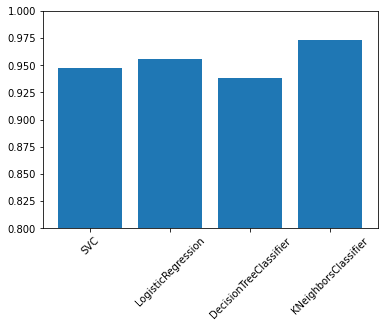

In [93]:
plt.bar(x=scores.keys(), height=scores.values())
plt.xticks(rotation='45')
plt.ylim(0.8, 1)
# Vemos que knn nos ha dado el mejor score

Ya que knn nos ha dado el mejor resultado vamos a probar con varios valores de k

1 vecinos ----> 0.93 score
2 vecinos ----> 0.93 score
3 vecinos ----> 0.93 score
4 vecinos ----> 0.939 score
5 vecinos ----> 0.956 score
6 vecinos ----> 0.965 score
7 vecinos ----> 0.956 score
8 vecinos ----> 0.956 score
9 vecinos ----> 0.956 score
10 vecinos ----> 0.974 score
11 vecinos ----> 0.982 score
12 vecinos ----> 0.982 score
13 vecinos ----> 0.974 score
14 vecinos ----> 0.974 score
15 vecinos ----> 0.965 score
16 vecinos ----> 0.965 score
17 vecinos ----> 0.965 score
18 vecinos ----> 0.965 score
19 vecinos ----> 0.965 score
20 vecinos ----> 0.965 score


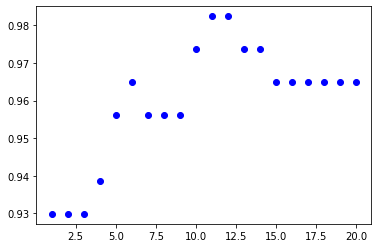

In [96]:
fig, ax = plt.subplots()
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X=X_train, y=y_train)
    score = model.score(X_test, y_test)
    print(f'{k} vecinos ----> {round(score, 3)} score')
    ax.plot(k, score , 'bo')

Vemos que con 11 y 12 vecinos tenemos mejores resultados con un 0.982